# Pandas

This is the last **data structure** that we will see and probably the most used and flexible.  
You can think about **Pandas as a NumPy array** (of n dimensions) on steroids. In fact pandas is specifically designed to make data cleaning and analysis fast and easy. It is often used in tandem with NumPy, SciPy and Matplotlib. Pandas shares many idiomatic style sintax with NumPy since it is an array-based computing (no need of much for loops).  
However, the biggest difference with NumPy, is that **Pandas is designad to work with tabular or heterogenous data**, while NumPy is best suited to work with homogenous numerical array data.  
Since the first distribution in 2010, Pandas has grown exponentially and nowdays is an essential tool for data analysis in particular seismologists, geodesist and anyone who has to deal with long time series and heterogenous data use this data structure. 

**Note abou this notebook**  
This notebook is by far an exaustive explanation of Pandas. I have selected **only the 0.1% of informations** that you need to get started.  
I very strongly encourage you to make the next step using these references:  
- [SciPy Pandas tutorial](https://www.youtube.com/watch?v=5rNu16O3YNE)
- Wes McKinney, Python for data analysis (2nd Edition) Published by O'Reilly. 
- Never forget that there is the [official documentation](https://pandas.pydata.org/pandas-docs/stable/reference/index.html#api)

In [1]:
import pandas as pd
import numpy as np

# 1. Pandas data structures

Pandas has two main data structures:  
- `Series` (1-dimensional array)
- `DataFrame` (n-dimensional array)

### 1.1 Series

A Series is a one-dimensional array-like object containing a sequence of values (of similar types to NumPy types) and an associated array of data labels, called its ***index***.

In [4]:
obj = pd.Series([1,2,3,4,5])

junk = np.array([1,2,3])

print(obj)
print(junk)

0    1
1    2
2    3
3    4
4    5
dtype: int64
[1 2 3]


In [9]:
print (obj.values)
print (obj.index) # if no index is specified, by default it is assigned an integer of 0 - (N-1)
obj[4]

[1 2 3 4 5]
RangeIndex(start=0, stop=5, step=1)


5

The powe of Pandas is that I can assign **index** that identify each data point with a **label**.

In [10]:
obj2 = pd.Series([1,2,3,4], index=['a','b','c','d'])
obj2

a    1
b    2
c    3
d    4
dtype: int64

In [12]:
obj2.index
obj2['a']

1

The power of index is that I can access values through the index name

In [13]:
print ('Access a value: ', obj2.b)
print ('')          
print ('access multiple values: ')
print(obj2[['b','d']])
obj2.d = 99             
print ('re-assign value: ')
print(obj2)

Access a value:  2

access multiple values: 
b    2
d    4
dtype: int64
re-assign value: 
a     1
b     2
c     3
d    99
dtype: int64


Using **NumPy functions** or NumPy-like operations, such as filtering with a boolean array, scalar multiplication, or applying math functions, will preserve the index-value link:

In [15]:
print (obj2[obj2 >2])
print (obj2*2)
print (np.exp(obj2))

b     2
c     3
d    99
dtype: int64
a      2
b      4
c      6
d    198
dtype: int64
a    2.718282e+00
b    7.389056e+00
c    2.008554e+01
d    9.889030e+42
dtype: float64


Another way to think about a Series is as a fixed-length, ordered dictionary, as it is a mapping of index values to data values. It can be used in many contexts where you might use a dict

In [16]:
print ('b' in obj2)
print ('f' in obj2)

True
False


We can create Series from dictionaries

In [22]:
data = {'measures':100, 'positive':30, 'negative':50, 'failed':20}
obj3 = pd.Series(data)
obj3

measures    100
positive     30
negative     50
failed       20
dtype: int64

We can change the order of the Series by passing a index order

In [23]:
values = ['measures','failed','negative','positive']
obj4 = pd.Series(data, index=values)
obj4

measures    100
failed       20
negative     50
positive     30
dtype: int64

When we compute arithmetric operations between two series that have the same indexes, Pandas authomatically aligns the labels. 

In [24]:
obj3 + obj4

failed       40
measures    200
negative    100
positive     60
dtype: int64

Both the Series object itself and its index have a name attribute, which integrates with other key areas of pandas functionality

In [25]:
obj4.name = 'today measures'
obj4.index.name = 'log'
obj4

log
measures    100
failed       20
negative     50
positive     30
Name: today measures, dtype: int64

### 1.2 DataFrame

DataFrame represents a rectangular table of data and contains an ordered collection of columns, each of which can be a different value type (numeric, string, boolean, etc.). The DataFrame has both a row and column index; it can be thought of as a dict of Series all sharing the same index or a NumPy 2D array.

In [26]:
data = {'students':['pippo','pluto','paperino','minni'],
        'exam1':[18,20,28,30],
        'exam2':[20,22,18,30]
       }
frame = pd.DataFrame(data)
frame

,students,exam1,exam2
0,pippo,18,20
1,pluto,20,22
2,paperino,28,18
3,minni,30,30


In [27]:
frame.head() # for large dataset you can use the head() method to acces only the first part

,students,exam1,exam2
0,pippo,18,20
1,pluto,20,22
2,paperino,28,18
3,minni,30,30


In [33]:
# as before you can choose the order of the columns 
frame= pd.DataFrame(data, columns=['exam1','exam2','students'],index=['a','b','c','d'])
frame

,exam1,exam2,students
a,18,20,pippo
b,20,22,pluto
c,28,18,paperino
d,30,30,minni


In [32]:
frame.exam1

a    18
b    20
c    28
d    30
Name: exam1, dtype: int64

In [34]:
# we can use an element of the dictionary as an index
frame = pd.DataFrame(data, columns=['exam1','exam2'], index=[data['students']])
frame

,exam1,exam2
pippo,18,20
pluto,20,22
paperino,28,18
minni,30,30


In [38]:
frame.axam2 
frame.loc['pippo']

,exam1,exam2
pippo,18,20


In [39]:
'''
If you add a column that is not contained in the dictionary
it will appear as missing values (NaN)
'''
frame = pd.DataFrame(data, columns=['exam1','exam2','exam3'], index=[data['students']])
frame

,exam1,exam2,exam3
pippo,18,20,NaN
pluto,20,22,NaN
paperino,28,18,NaN
minni,30,30,NaN


In [40]:
frame.exam3

pippo       NaN
pluto       NaN
paperino    NaN
minni       NaN
Name: exam3, dtype: object

A column in a DataFrame can be retrieved as a Series either by dict-like notation or by attribute

In [44]:
exam1 = frame.exam1
print (exam1)
exam1b = frame[['exam1','exam2']]
print(exam1b)

pippo       18
pluto       20
paperino    28
minni       30
Name: exam1, dtype: int64
          exam1  exam2
pippo        18     20
pluto        20     22
paperino     28     18
minni        30     30


Columns can be modified by assignment. Let's say that now the students have given the third exam, I can assign the grades by:  
n.b. the list or array that I assign must be of the same length as the DataFrame

In [47]:
frame['exam3']=[19,23,30,30]
frame

,exam1,exam2,exam3
pippo,18,20,19
pluto,20,22,23
paperino,28,18,30
minni,30,30,30


Columns can be added by direct assignment

In [48]:
frame['exam4'] = [18,18,18,18]
frame

,exam1,exam2,exam3,exam4
pippo,18,20,19,18
pluto,20,22,23,18
paperino,28,18,30,18
minni,30,30,30,18


Operation between DataFrames and Series are performed index-wise. If you assign a Series, its labels will be realigned exactly to the DataFrame’s index, inserting missing values in any holes.

In [49]:
frame = pd.DataFrame(data, columns=['exam1','exam2','exam3'], index=['pippo','pluto','paperino','minni'])

new = pd.Series([30,20], index=['pippo','minni'])
frame['exam5'] = new

print(new)
frame

pippo    30
minni    20
dtype: int64


,exam1,exam2,exam3,exam5
pippo,18,20,NaN,30.0
pluto,20,22,NaN,NaN
paperino,28,18,NaN,NaN
minni,30,30,NaN,20.0


In [50]:
# delete a column 
del frame['exam3']
frame

,exam1,exam2,exam5
pippo,18,20,30.0
pluto,20,22,NaN
paperino,28,18,NaN
minni,30,30,20.0


Another common form of data is a **nested dict of dicts**.  
If the nested dict is passed to the DataFrame, pandas will interpret the outer dict keys
as the **columns** and the inner keys as the **row** indices

In [51]:
data = {'exam1':{'pippo':18,'pluto':20,'minni':30},
        'exam2':{'pippo':30,'pluto':18,'minni':25}
}
frame = pd.DataFrame(data)
frame

,exam1,exam2
pippo,18,30
pluto,20,18
minni,30,25


Transpose the axis

In [52]:
frame.T

,pippo,pluto,minni
exam1,18,20,30
exam2,30,18,25


Clearly not only dictionaries can be used to construct DataFrames. Here is a list of possible **DataFrame constructor**.  

| type | notes |  
|-----|-----|  
| 2D ndarray | A matrix of data, passing optional row and column labels | 
| dict of arrayslists, or tuples | Each sequence becomes a column in the DataFrame all sequences must be the same length |  
| NumPy structured/record array | Treated as the “dict of arrays” case |  
| dict of Series | Each value becomes a column; indexes from each Series are unioned together to form the result’s row index if no explicit index is passed |  
| 
| dict of dicts |  Each inner dict becomes a column; keys are unioned to form the row index as in the “dict of Series” case |  
| List of dicts or Series | Each item becomes a row in the DataFrame; union of dict keys or Series indexes become the DataFrame’s column labels |  
| List of lists or tuples | Treated as the “2D ndarray” case |  
| Another DataFrame | The DataFrame’s indexes are used unless diferent ones are passed |  
| NumPy MaskedArray | Like the “2D ndarray” case except masked values become NA/missing in the DataFrame result |

# 2. Pandas Indexing, selection and filtering

### 2.1 Series indexing  
Series indexing (obj[...]) works analogously to NumPy array indexing, except you can use the Series’s index values instead of only integers

In [53]:
obj = pd.Series(np.arange(4.), index=['a', 'b', 'c', 'd'])
print (obj)
print('select the value by index')
print (obj['b']) # select the values by index
print('select the value by position') 
print (obj[1]) # select the values by position
print('select range of values by position')
print (obj[2:4]) # select range of values by position
print('select range of values by index')
print (obj[['b', 'a', 'd']]) # select range of values by index
print('select two values by position')
print (obj[[1, 3]]) 
print('select values by condition')
print (obj[obj < 2])

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64
select the value by index
1.0
select the value by position
1.0
select range of values by position
c    2.0
d    3.0
dtype: float64
select range of values by index
b    1.0
a    0.0
d    3.0
dtype: float64
select two values by position
b    1.0
d    3.0
dtype: float64
select values by condition
a    0.0
b    1.0
dtype: float64


Slicing with labels behaves differently than normal Python slicing in that the endpoint is inclusive

In [54]:
obj['b':'c']

b    1.0
c    2.0
dtype: float64

In [55]:
obj['b':'c'] = 5
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

### 2.2 DataFrame indexing

In [56]:
data = pd.DataFrame(np.random.randint(18,30,16).reshape((4, 4)),
                    index=['pippo', 'pluto', 'minni', 'topo'],
                    columns=['exam1', 'exam2', 'exam3', 'exam4'])
data

,exam1,exam2,exam3,exam4
pippo,28,25,27,25
pluto,29,19,24,21
minni,29,24,25,19
topo,24,20,23,28


In [57]:
data['exam1'] # access the value of a column

pippo    28
pluto    29
minni    29
topo     24
Name: exam1, dtype: int32

In [58]:
data[['exam1','exam4']] # access multiple columns

,exam1,exam4
pippo,28,25
pluto,29,21
minni,29,19
topo,24,28


In [59]:
data[:2] # access rows

,exam1,exam2,exam3,exam4
pippo,28,25,27,25
pluto,29,19,24,21


In [60]:
data > 25 # dreate boolean masks

,exam1,exam2,exam3,exam4
pippo,True,False,True,False
pluto,True,False,False,False
minni,True,False,False,False
topo,False,False,False,True


In [61]:
data[data < 20] = 'fail' # assign values by boolean indexing
data

,exam1,exam2,exam3,exam4
pippo,28,25,27,25
pluto,29,fail,24,21
minni,29,24,25,fail
topo,24,20,23,28


#### 2.3 Selection with loc and iloc

To perform label indexing along the rows of a DataFrame there are the special indexing operators **loc and iloc**. They enable the selection of a subset of rows and columns for a DataFrame using the Numpy-like notation using:  
- loc for axis label
- iloc for integer 

In [62]:
data

,exam1,exam2,exam3,exam4
pippo,28,25,27,25
pluto,29,fail,24,21
minni,29,24,25,fail
topo,24,20,23,28


In [65]:
data.loc['pippo',['exam1','exam3']]

exam1    28
exam3    27
Name: pippo, dtype: object

In [66]:
data.loc['pippo','exam1':'exam3']

exam1    28
exam2    25
exam3    27
Name: pippo, dtype: object

In [69]:
data.loc[['pippo','topo'],['exam1','exam4']]

,exam1,exam4
pippo,28,25
topo,24,28


In [70]:
data.iloc[2,2:4]

exam3      25
exam4    fail
Name: minni, dtype: object

# 3. Reading and writing data

Pandas has a vast number of function to read and write data. We will see only a couple of them that most useful fo us.  
- [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) Load delimited data from a ile, URL, or ile-like object; use comma as default delimiter
- `read_excel` Read tabular data from an Excel XLS or XLSX ile
- [`read_table`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_table.html) Load delimited data from a ile, URL, or ile-like object; use tab ('\t') as default delimiter  

Some of these functions, like pandas.read_csv, perform **type inference**, because the column data types are not part of the data format. That means you don’t necessarily have to specify which columns are numeric, integer, boolean, or string.

These functions share in common some useful arguments to convert text data into DataFrames:  

| argument | Description |  
|---- | ---- |  
| Indexing | Can treat one or more columns as the returned DataFrame, and whether to get column names from the file, the user, or not at all. |  
| DateTime parsing | Includes combining capability, including combining date and time information spread over multiple columns into a single column in the result. |  
| Unclean data issues | Skipping rows or a footer, comments, or other minor things like numeric data with thousands separated by commas. |  


In [71]:
data = pd.read_csv('./L06/friction_data.txt')
data

,fault,mu_25C,mu_50C,mu_100C
0,fault1,0.6,0.4,0.1
1,fault2,0.4,0.4,0.3
2,fault3,0.8,0.5,0.1


In [72]:
data = pd.read_table('./L06/friction_data.txt',delimiter=',')
data

,fault,mu_25C,mu_50C,mu_100C
0,fault1,0.6,0.4,0.1
1,fault2,0.4,0.4,0.3
2,fault3,0.8,0.5,0.1


In [73]:
data = pd.read_csv('./L06/friction_data.txt',index_col='fault')
data

,mu_25C,mu_50C,mu_100C
fault,,,
fault1,0.6,0.4,0.1
fault2,0.4,0.4,0.3
fault3,0.8,0.5,0.1


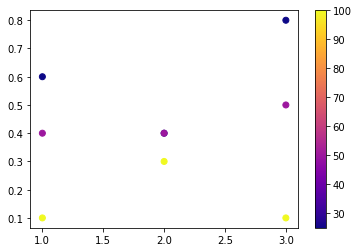

In [75]:
import matplotlib.pyplot as plt
# plot the data as a function of fault type and color code by temperature 
x = np.ones(len(data.iloc[0]))
temp = [25,50,100]
f, ax = plt.subplots(1,1)
cm = plt.get_cmap('plasma')
sc=ax.scatter(x,data.loc['fault1'],c=temp,cmap=cm,vmin=25,vmax=100)
sc=ax.scatter(x*2,data.loc['fault2'],c=temp,cmap=cm,vmin=25,vmax=100)
sc=ax.scatter(x*3,data.loc['fault3'],c=temp,cmap=cm,vmin=25,vmax=100)
plt.colorbar(sc)
sc.set_label('Temperature')

In [76]:
x

array([1., 1., 1.])

#### Let's complicate things now  
We will import a data file from the Acuto natural laboratory.   
This file contains data from different sensors for the month of february 2017.

In [77]:
data = pd.read_csv('./L06/Dati_Olinda_Febbraio_2017.csv',header=[0,1])
data.head()

,Timestamp,WS_Max,WD_Prev,SG01,SG02,SG03,SG05,F01,F02,Troccia,Tamb,UR,RG
,Unnamed: 0_level_1,m/s,gradi,ustrain,ustrain,ustrain,ustrain,mm,mm,°C,°C,%,mm
0,01/02/2017 00:00:00,2.548,82.60,-5573,-5393,-5455,-5419,3.31,6.97,7.604,5.938,92.4,0.0
1,01/02/2017 00:01:00,2.883,199.40,-5572,-5390,-5455,-5419,3.31,6.98,7.604,5.870,92.5,0.0
2,01/02/2017 00:02:00,3.168,77.67,-5573,-5390,-5455,-5419,3.31,6.97,7.605,5.837,92.8,0.0
3,01/02/2017 00:03:00,3.336,68.24,-5572,-5390,-5455,-5418,3.31,6.98,7.605,5.871,93.1,0.0
4,01/02/2017 00:04:00,3.319,73.17,-5572,-5390,-5456,-5419,3.31,6.97,7.606,5.906,93.2,0.0


In [78]:
df = pd.read_csv('./L06/Dati_Olinda_Febbraio_2017.csv', skiprows=[1])
df.head()

,Timestamp,WS_Max,WD_Prev,SG01,SG02,SG03,SG05,F01,F02,Troccia,Tamb,UR,RG
0,01/02/2017 00:00:00,2.548,82.60,-5573,-5393,-5455,-5419,3.31,6.97,7.604,5.938,92.4,0.0
1,01/02/2017 00:01:00,2.883,199.40,-5572,-5390,-5455,-5419,3.31,6.98,7.604,5.870,92.5,0.0
2,01/02/2017 00:02:00,3.168,77.67,-5573,-5390,-5455,-5419,3.31,6.97,7.605,5.837,92.8,0.0
3,01/02/2017 00:03:00,3.336,68.24,-5572,-5390,-5455,-5418,3.31,6.98,7.605,5.871,93.1,0.0
4,01/02/2017 00:04:00,3.319,73.17,-5572,-5390,-5456,-5419,3.31,6.97,7.606,5.906,93.2,0.0


In [79]:
df.SG01

0       -5573
1       -5572
2       -5573
3       -5572
4       -5572
         ... 
40315   -5606
40316   -5606
40317   -5605
40318   -5607
40319   -5607
Name: SG01, Length: 40320, dtype: int64

In [83]:
df.Timestamp
#plt.plot(df.Timestamp)

0        01/02/2017 00:00:00
1        01/02/2017 00:01:00
2        01/02/2017 00:02:00
3        01/02/2017 00:03:00
4        01/02/2017 00:04:00
                ...         
40315    28/02/2017 23:55:00
40316    28/02/2017 23:56:00
40317    28/02/2017 23:57:00
40318    28/02/2017 23:58:00
40319    28/02/2017 23:59:00
Name: Timestamp, Length: 40320, dtype: object

As you can see the `Timestamp` column must be interpreted since it is a mix of numbers and different delimiter. 

In [84]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], format='%d/%m/%Y %H:%M:%S' )
df

,Timestamp,WS_Max,WD_Prev,SG01,SG02,SG03,SG05,F01,F02,Troccia,Tamb,UR,RG
0,2017-02-01 00:00:00,2.548,82.60,-5573,-5393,-5455,-5419,3.31,6.97,7.604,5.938,92.4,0.0
1,2017-02-01 00:01:00,2.883,199.40,-5572,-5390,-5455,-5419,3.31,6.98,7.604,5.870,92.5,0.0
2,2017-02-01 00:02:00,3.168,77.67,-5573,-5390,-5455,-5419,3.31,6.97,7.605,5.837,92.8,0.0
3,2017-02-01 00:03:00,3.336,68.24,-5572,-5390,-5455,-5418,3.31,6.98,7.605,5.871,93.1,0.0
4,2017-02-01 00:04:00,3.319,73.17,-5572,-5390,-5456,-5419,3.31,6.97,7.606,5.906,93.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40315,2017-02-28 23:55:00,1.643,242.00,-5606,-5393,-5510,-5432,3.27,6.98,10.490,8.350,98.0,0.0
40316,2017-02-28 23:56:00,1.810,229.90,-5606,-5392,-5510,-5433,3.27,6.98,10.490,8.380,98.0,0.0
40317,2017-02-28 23:57:00,2.565,224.40,-5605,-5393,-5510,-5433,3.27,6.98,10.490,8.310,98.1,0.0
40318,2017-02-28 23:58:00,1.961,248.70,-5607,-5391,-5510,-5432,3.27,6.98,10.490,8.350,98.0,0.0


In [86]:
import matplotlib.pyplot as plt
%matplotlib qt
f, ax = plt.subplots(1,1)
ax.plot(df.Timestamp,df.SG01,'k-o')

## Homework  
Find if there is a relation betwee wind speed and temperature (at the Troccia station) in the period between February 15th and February 20th.